# Introducción

Para el reto de averiguar los casos de dengue en el amazonas, el cuál ante todo nos hemos dado cuenta que es un problema de regresión dónde vamos a aplicar el modelo de árbol ForestRandomRegressor, tenemos las siguientes variables : 

City: la ciudad donde se han registrado los casos de dengue en este caso San Juan y Iquitos.

Year: el año en el que se registraron los casos de dengue.

Weekofyear: la semana del año en la que se registraron los casos de dengue.

Week_start_date: la fecha de inicio de la semana en la que se registraron los casos de dengue.

Ndvi_ne: el índice de vegetación de diferencia normalizada para la región noreste.

Ndvi_nw: el índice de vegetación de diferencia normalizada para la región noroeste.

Ndvi_se: el índice de vegetación de diferencia normalizada para la región sureste.

Ndvi_sw: el índice de vegetación de diferencia normalizada para la región suroeste.

Precipitation_amt_mm: la cantidad de precipitación en milímetros.

Reanalysis_air_temp_k: la temperatura del aire según la reanálisis.

Reanalysis_avg_temp_k: la temperatura media según la reanálisis.

Reanalysis_dew_point_temp_k: la temperatura de punto de rocío según la reanálisis.

Reanalysis_max_air_temp_k: la temperatura máxima del aire según la reanálisis.

Reanalysis_min_air_temp_k: la temperatura mínima del aire según la reanálisis.

Reanalysis_precip_amt_kg_per_m2: la cantidad de precipitación en kilogramos por metro cuadrado según la reanálisis.

Reanalysis_relative_humidity_percent: la humedad relativa según la reanálisis.

Reanalysis_sat_precip_amt_mm: la cantidad de precipitación en milímetros según la reanálisis.

Reanalysis_specific_humidity_g_per_kg: la humedad específica según la reanálisis.

Reanalysis_tdtr_k: la amplitud diaria de la temperatura según la reanálisis.

Station_avg_temp_c: la temperatura promedio en grados Celsius según la estación meteorológica.

Station_diur_temp_rng_c: la variación diurna de la temperatura en grados Celsius según la estación meteorológica.

Station_max_temp_c: la temperatura máxima en grados Celsius según la estación meteorológica.

Station_min_temp_c: la temperatura mínima en grados Celsius según la estación meteorológica.

Station_precip_mm: la cantidad de precipitación en milímetros según la estación meteorológica.

# Lectura de ficheros train,test y label

Leo todos los ficheros desde el repositorio de github que he creado para ésta actividad dónde también se encuentra el código

In [43]:
# carga de datos
import io
from google.colab import files
import pandas as pd
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from google.colab import drive


# subimos el fichero
#asignamos el csv a la variable
x_train = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_features_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_labels_train.csv')
X_test =pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/dengue_features_test.csv')

# Obtención de csv completo y limpio

1. Rellenar valores nulos usando el siguiente método que se encarga de generar un valor nuevo a partir de la media de los últimos 20.

In [44]:
x_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

2. Cambiar datos de categóricos a numéricos y ver que casi todos los datos son de tipo float64 o int64.

In [45]:
x_train['city'].replace(['sj','iq'], [0,1], inplace = True)
X_test['city'].replace(['sj','iq'],[0,1],inplace=True)
x_train['week_start_date'] = x_train['week_start_date'].str.replace('-','')
x_train['week_start_date'] = pd.to_numeric(x_train['week_start_date'], errors='coerce')
X_test['week_start_date'] = X_test['week_start_date'].str.replace('-',' ')
X_test['week_start_date'] = pd.to_numeric(X_test['week_start_date'], errors='coerce')
x_train.dtypes

city                                       int64
year                                       int64
weekofyear                                 int64
week_start_date                            int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

3. Vemos la media, mediana, desviación estándar...

In [46]:
x_train.describe()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.357143,2001.031593,26.503434,2.001097e+07,0.123334,0.125890,0.200704,0.199249,45.351813,296.650329,...,39.876051,81.597660,45.351813,16.631410,4.870075,26.382907,7.821312,32.006662,21.889629,38.732143
std,0.479322,5.408314,15.019437,5.405874e+04,0.139484,0.120302,0.077403,0.086849,43.732321,24.715317,...,43.411809,9.843965,43.732321,2.068125,3.557382,4.776776,2.501954,4.250146,2.666278,47.339064
min,0.000000,1990.000000,1.000000,1.990043e+07,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,13.750000,1.997043e+07,0.000000,0.040175,0.152580,0.141007,9.115000,297.640000,...,12.800000,77.090357,9.115000,15.511429,2.325000,26.200000,6.439286,31.100000,21.000000,8.175000
50%,0.000000,2002.000000,26.500000,2.002053e+07,0.104114,0.114633,0.195207,0.187464,37.660000,298.627857,...,27.080000,80.255714,37.660000,17.065000,2.835714,27.385714,7.242857,32.800000,22.200000,23.150000
75%,1.000000,2005.000000,39.250000,2.005113e+07,0.229292,0.212325,0.247021,0.246082,70.047500,299.827500,...,52.042500,86.041429,70.047500,17.974643,7.553571,28.128571,9.500000,33.900000,23.300000,53.600000
max,1.000000,2010.000000,53.000000,2.010062e+07,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


# Matriz de correlación

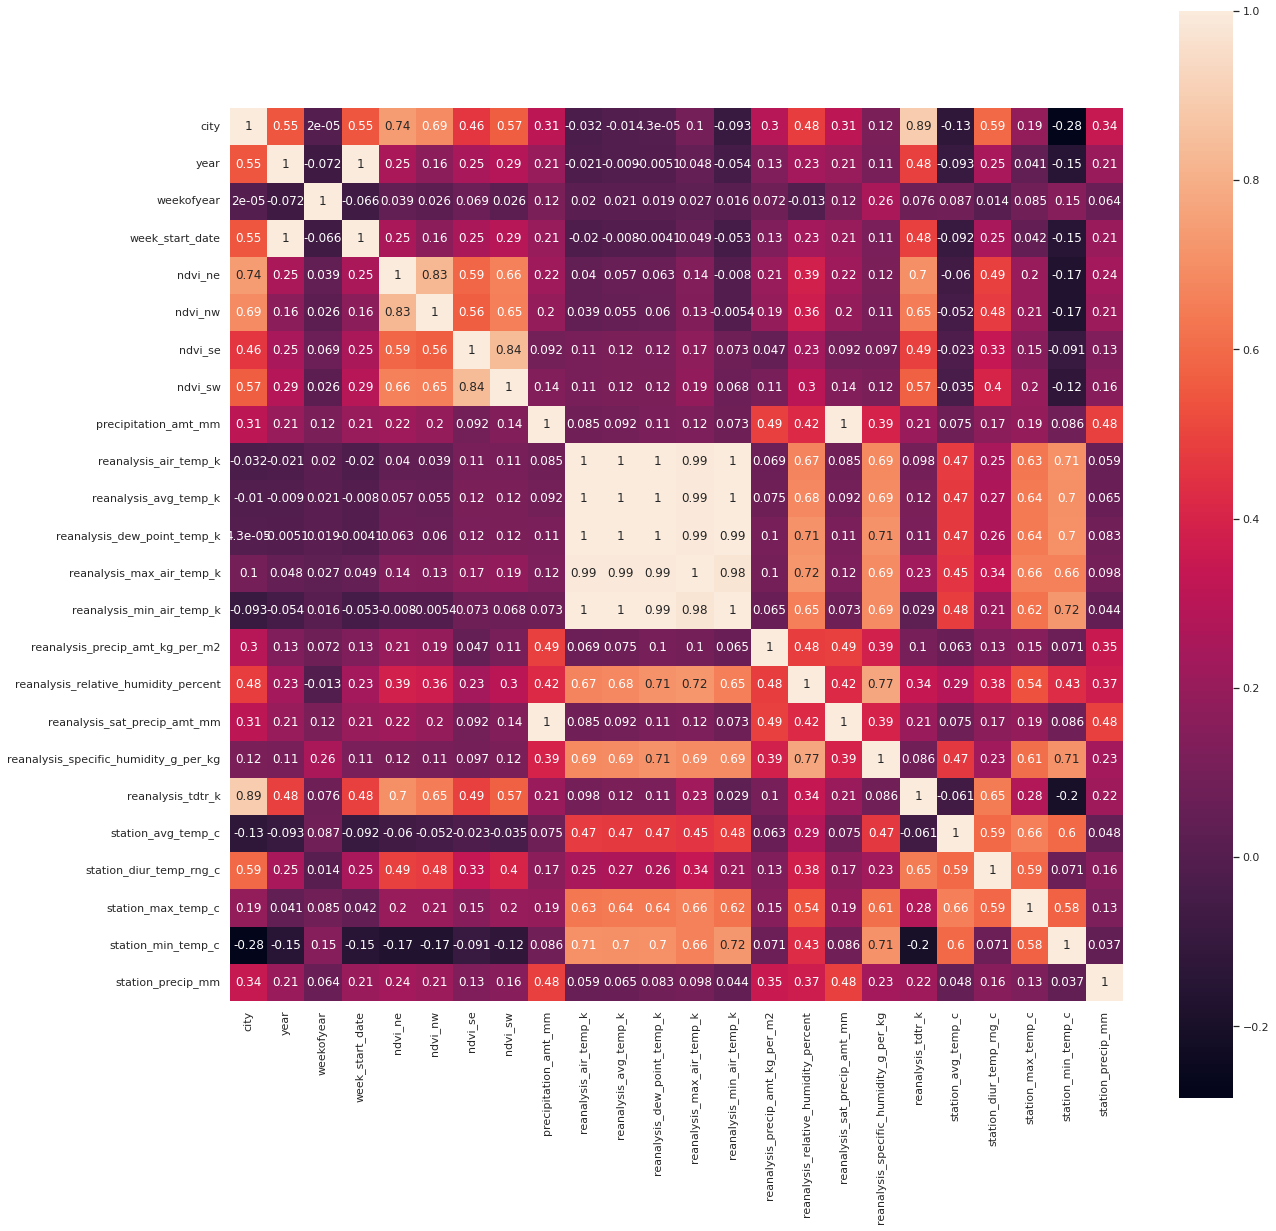

In [47]:
fig,ax = plt.subplots(figsize=(20,20))
sns.set()
sns.heatmap(x_train.corr(), square=True, annot=True)
plt.show()

# Procesado de datos

Debido a la conclusión anteriormente dicha, eliminaremos la columna **'week_start_date'** por la poca correlación que se puede observar en la matriz de correlación y además **precipitation_amt_mm** que tiene los mismos valores que otra columna llamanda **reanalysis_sat_precip_amt_mm**.

In [48]:
x_train = x_train.drop(['week_start_date','precipitation_amt_mm'],axis=1)
X_test = X_test.drop(['week_start_date','precipitation_amt_mm'],axis=1)
x_train

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,1990,18,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0,1990,19,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0,1990,20,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0,1990,21,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0,1990,22,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1,2010,21,0.342750,0.318900,0.256343,0.292514,299.334286,300.771429,296.825714,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1,2010,22,0.160157,0.160371,0.136043,0.225657,298.330000,299.392857,296.452857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1,2010,23,0.247057,0.146057,0.250357,0.233714,296.598571,297.592857,295.501429,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1,2010,24,0.333914,0.245771,0.278886,0.325486,296.345714,297.521429,295.324286,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


En la siguiente celda pasamos a escalar los datos de distintas maneras, solo el mejor escalamiento esta descomentado.
Los demás son buenos, hacen que el MAE se reduzca pero el mejor es el MaxAbsScaler el cuál se encarga de escalar y desplazar cada característica individualmente de forma que el valor máximo absoluto en todas ellas sea 1 o cerca de él.

In [49]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler


scaler =MaxAbsScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)
x_train

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.0,0.99005,0.339623,0.241169,0.227417,0.368713,0.325295,0.984688,0.982881,0.979776,...,0.056091,0.743999,0.031797,0.684843,0.163993,0.826067,0.436709,0.696682,0.781250,0.029450
1,0.0,0.99005,0.358491,0.334214,0.311719,0.301603,0.284764,0.986802,0.985192,0.984927,...,0.031446,0.784592,0.058423,0.751309,0.147950,0.867347,0.403255,0.751185,0.867187,0.015829
2,0.0,0.99005,0.377358,0.063440,0.379230,0.292023,0.312890,0.988688,0.986631,0.989895,...,0.045749,0.832095,0.088428,0.823431,0.143494,0.867347,0.410488,0.763033,0.890625,0.076201
3,0.0,0.99005,0.396226,0.253037,0.537309,0.422722,0.432012,0.989368,0.987786,0.989479,...,0.024365,0.814696,0.039324,0.814843,0.151515,0.891929,0.428571,0.789100,0.910156,0.007362
4,0.0,0.99005,0.415094,0.385949,0.574874,0.466642,0.452990,0.991127,0.989224,0.991193,...,0.021385,0.815942,0.019252,0.841095,0.188057,0.939703,0.593128,0.829384,0.933594,0.010676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,1.00000,0.396226,0.674231,0.699189,0.476196,0.535724,0.990517,0.992879,0.994558,...,0.078878,0.900169,0.141577,0.903442,0.611408,0.929654,0.755274,0.838863,0.875000,0.049696
1452,1.0,1.00000,0.415094,0.315048,0.351615,0.252720,0.413279,0.987194,0.988328,0.993308,...,0.363015,0.928912,0.221377,0.883125,0.466132,0.890693,0.664557,0.822275,0.847656,0.067366
1453,1.0,1.00000,0.433962,0.485991,0.320230,0.465076,0.428035,0.981464,0.982386,0.990120,...,0.088694,0.956090,0.150896,0.831250,0.467914,0.792208,0.436709,0.763033,0.750000,0.013620
1454,1.0,1.00000,0.452830,0.656850,0.538854,0.518072,0.596109,0.980628,0.982150,0.989527,...,0.109255,0.959943,0.152765,0.821825,0.491087,0.825758,0.552743,0.739336,0.820312,0.029450


# Parametrización y entrenamiento del modelo

Añadimos todos los parámetros necesarios para la parametrización del modelo en este caso usando cuantos arboles se generarán,criterios de error,profundidad,... 

In [50]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [51]:
random_test=sp_randint(2, 50)

In [52]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['log2', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), # Genera valores aletorios entre los valores indicados para el Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Genera valores aletorios entre los valores indicados para el Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error", "absolute_error"]}

In [53]:
# MUY INTERESANTE: Probar a realizar el entrenamienmto utilizando timeSeriesSplit y comentar las diferencias en lsoresultados obtenidos
from sklearn.model_selection import train_test_split
regressor = RandomForestRegressor()
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, n_iter = 100, cv = 5, random_state=0, n_jobs = -1)

#pasamos datos de entrada y salida, además de eliminar la columna de nombres de coches del csv
y= y_train['total_cases']

# separamos train y test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_train, y, test_size=0.3, random_state=2)

# Fit the random search model
rnd_regres.fit(Xtrain, Ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe1a2503e50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe1a19367c0>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

Método para el imforme de los resultados del RandomizeSearch para ver los modelos con distintos parámetros.

In [54]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [55]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.442 (std: 0.113)
Parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.405 (std: 0.209)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 22, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.405 (std: 0.203)
Parameters: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 16}

Model with rank: 4
Mean validation score: 0.367 (std: 0.133)
Parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 35, 'n_estimators': 64}

Model with rank: 5
Mean validation score: 0.348 (std: 0.119)
P

Mejor estimador con sus parámetros.

In [56]:
rnd_regres.best_params_

{'bootstrap': False,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 32}

# Cross Validation y predicción final



1. Obtenemos el modelo con los mejores parámetros.

In [57]:
best = rnd_regres.best_estimator_

2. Entrenamos

In [58]:
# fit and predict
best.fit(x_train, y)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='log2',
                      min_samples_split=12, n_estimators=32)

CV (cross validation)

Min Value  :29.187008508375357 (17)


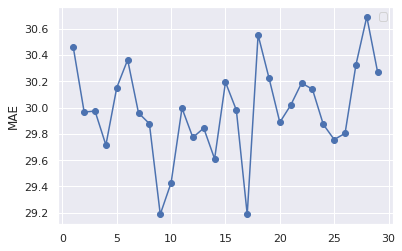

In [59]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = TimeSeriesSplit(n_splits = 10) # Debemos utilizar este método porque trabajaremos con series temporales.
Ytest = Ytest[0:416]
total_scores = []
for i in range(1,30):
    fold_accuracy = []
    # verificar cada uno de los modelos con validación cruzada.
    for train_fold, test_fold in cv.split(x_train):
      # División train test aleatoria
      f_train = x_train.loc[train_fold]
      f_test = x_train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      best.fit(x_train,y)
      y_pred = best.predict(X_test)
      # evaluación del modelo
      mae = mean_absolute_error(Ytest, y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value  :' +  str(min(total_scores)) +' (' + str(np.argmin(total_scores) + 1) + ')')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [60]:
# fit and predict
y_pred = best.predict(X_test)
Ytest = Ytest[0:416]
# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Ytest, y_pred)
print ('MAE', mae)

MAE 30.330240665781847


# Rekevancia de características.

In [61]:
# FEATURE RELEVANCIES
features = x_train.columns
print ('Feature Relevancies')
pd.DataFrame({'Attributes': features ,
              'Random Forests': best.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,city,0.016972
1,year,0.073911
2,weekofyear,0.073792
3,ndvi_ne,0.015619
4,ndvi_nw,0.013475
5,ndvi_se,0.268773
6,ndvi_sw,0.146014
7,reanalysis_air_temp_k,0.030066
8,reanalysis_avg_temp_k,0.042273
9,reanalysis_dew_point_temp_k,0.036384


# Mostrar predicción

In [62]:
y_pred

array([  9.67861225,   9.98917158,  12.4369755 ,  15.39966821,
        18.32864706,  15.48209769,  17.72552027,  34.40621674,
        26.01707471,  38.61754019,  20.6139639 ,  31.6444886 ,
        34.72529453,  49.05965691,  90.66518254,  84.69612486,
        85.30812426,  81.99152499, 113.96348586,  94.52333269,
        90.39391627,  62.80783746,  90.01192069,  33.13906311,
        35.04047654,  37.02180897,  32.48490552,  46.395024  ,
        29.3859099 ,  31.1761074 ,  35.65158154,  23.03958017,
        25.28723735,  33.76851848,  19.46682485,  20.07985833,
        15.49647398,  18.63948121,  14.76146358,  18.65401856,
        12.28762612,  12.24130453,  11.64441896,  10.9885419 ,
        10.59646055,  11.41108609,   9.58318629,  10.17727359,
        10.36477528,  10.85926142,  10.18119708,   9.73651392,
        10.36204458,  10.20604353,  14.94302617,  12.55882774,
        28.99972338,  20.69322165,  18.54394098,  21.86617763,
        24.12690202,  33.00587939,  38.40901986,  44.77

# Carga del fichero, reemplazo de valores de la columna de casos y descarga del mismo

1. Cargamos el csv que nos han proporcionado, luego reemplazamos los valores por la predicción obtenida como se puede ver en el siguiente dataframe.

In [63]:
results = pd.read_csv('https://raw.githubusercontent.com/alexander6779/SNS/main/challenge_dengue/submission_format.csv')
results['total_cases'] = y_pred.astype('int')
results

,city,year,weekofyear,total_cases
0,sj,2008,18,9
1,sj,2008,19,9
2,sj,2008,20,12
3,sj,2008,21,15
4,sj,2008,22,18
...,...,...,...,...
411,iq,2013,22,9
412,iq,2013,23,9
413,iq,2013,24,7
414,iq,2013,25,5


2. Descargamos el csv.

Importante: se descargar en los archivos del colab en la carpeta de content, luego ahí lo descargas en tu ordenador.

In [64]:
results.to_csv("results_cases_dengue.csv", index=False) 